# Tugas Besar Probabilitas dan Statistika
## T. Antra Oksidian Tafly / 13517020
## Jan Meyer Saragih / 13517131

# Soal 1
## Fifa.csv
### Header

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as plt
import scipy.stats as stats

from scipy.stats import binom

### Membaca data

In [2]:
data = pd.read_csv('fifa.csv')
data

Name  Age          Nationality
0                  L. Messi   31            Argentina
1         Cristiano Ronaldo   33             Portugal
2                 Neymar Jr   26               Brazil
3                    De Gea   27                Spain
4              K. De Bruyne   27              Belgium
5                 E. Hazard   27              Belgium
6                 L. Modrić   32              Croatia
7                 L. Suárez   31              Uruguay
8              Sergio Ramos   32                Spain
9                  J. Oblak   25             Slovenia
10           R. Lewandowski   29               Poland
11                 T. Kroos   28              Germany
12                 D. Godín   32              Uruguay
13              David Silva   32                Spain
14                 N. Kanté   27               France
15                P. Dybala   24            Argentina
16                  H. Kane   24              England
17             A. Griezmann   27               France
18            M. ter Stegen   26              Germany
19              T. Courtois   26              Belgium
20          Sergio Busquets   29                Spain
21                E. Cavani   31              Uruguay
22                 M. Neuer   32              Germany
23                S. Agüero   30            Argentina
24             G. Chiellini   33                Italy
25                K. Mbappé   19               France
26                 M. Salah   26                Egypt
27                 Casemiro   26               Brazil
28             J. Rodríguez   26             Colombia
29               L. Insigne   27                Italy
...                     ...  ...                  ...
18177             R. Roache   18  Republic of Ireland
18178          L. Wahlstedt   18               Sweden
18179           J. Williams   17              England
18180              M. Hurst   22             Scotland
18181              C. Maher   17  Republic of Ireland
18182               Y. Góez   18             Colombia
18183         K. Pilkington   44              England
18184             D. Horton   18              England
18185              E. Tweed   19  Republic of Ireland
18186          Zhang Yufeng   20             China PR
18187             C. Ehlich   19              Germany
18188            L. Collins   17                Wales
18189            A. Kaltner   18              Germany
18190            L. Watkins   18              England
18191  J. Norville-Williams   18              England
18192             S. Squire   18              England
18193            N. Fuentes   18                Chile
18194              J. Milli   18                Italy
18195            S. Griffin   18  Republic of Ireland
18196           K. Fujikawa   19                Japan
18197            D. Holland   18  Republic of Ireland
18198            J. Livesey   18              England
18199          M. Baldisimo   18               Canada
18200              J. Young   18             Scotland
18201              D. Walsh   18  Republic of Ireland
18202          J. Lundstram   19              England
18203    N. Christoffersson   19               Sweden
18204             B. Worman   16              England
18205        D. Walker-Rice   17              England
18206             G. Nugent   16              England

[18207 rows x 3 columns]

### Deskripsi data
#### Deskripsi data numerik

In [3]:
def mode(x):
    return x.value_counts().index[0]
data.agg({'Age':['min', 'max', 'mean', mode, 'median', 'var', 'std', 'skew', 'kurtosis']})

Age
min       16.000000
max       45.000000
mean      25.122206
mode      21.000000
median    25.000000
var       21.808365
std        4.669943
skew       0.391764
kurtosis  -0.459514

#### Deskripsi data objek

In [4]:
data.describe(include = ['object'])

Name Nationality
count          18207       18207
unique         17194         164
top     J. Rodríguez     England
freq              11        1662

### Boxplot

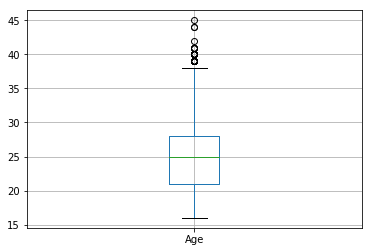

In [5]:
ages = data[['Age']]
ages.boxplot()

### Histogram

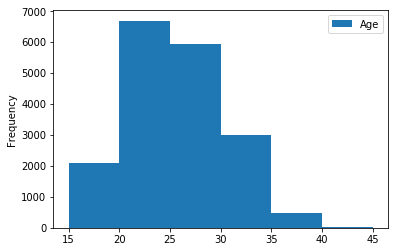

In [6]:
ages.plot(kind = 'hist', bins = [15, 20, 25, 30, 35, 40, 45])

### Fungsi distribusi peluang
#### Fungsi distribusi peluang yang digunakan adalah distribusi hipergeometrik. Tipe distribusi ini dipilih karena peluang memiliki densitas yang semakin besar semakin mendekati rata-rata. Dalam kasus ini, pemain yang diambil ke dalam sebuah tim tidak dapat merupakan pemain yang sama. Maka dari itu, digunakan distribusi hipergeometrik.

### Jawaban pertanyaan 1-a-i
#### Ekspektasi jumlah pemain berumur kurang dari 22 jika ditambah 1000 data
#### Mencari jumlah pemain dengan umur kurang dari 22, lalu bagi dengan total data, kemudian kalikan dengan 1000. Lalu bulatkan hasilnya.

In [7]:
ages22 = ages[ages < 22].count()
count_row = data.shape[0]
probability = ((ages22 / count_row * 1000).round(0)).astype(np.int64)
probability.rename(index={'Age':'Result'})

Result    261
dtype: int64

### Jawaban pertanyaan 1-a-ii
#### Ekspektasi jumlah pemain berumur lebih dari 40 jika ditambah 1000 data
#### Mencari jumlah pemain dengan umur lebih dari 40, lalu bagi dengan total data, kemudian kalikan dengan 1000. Lalu bulatkan hasilnya

In [8]:
ages40 = ages[ages > 40].count()
probability2 = ((ages40 / count_row * 1000).round(0)).astype(np.int64)
probability2.rename(index={'Age':'Result'})

Result    0
dtype: int64

# Soal 2
## Crime.csv
### Header

In [9]:
import numpy as np
import pandas as pd
import matplotlib
import scipy
import datetime
import warnings; warnings.simplefilter('ignore')

### Membaca data

In [10]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
crime = pd.read_csv('crime.csv', encoding = "ISO-8859-1", low_memory=False, parse_dates=['OCCURRED_ON_DATE'], date_parser=dateparse)
crime

INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP  \
0           I182080058          2403               Disorderly Conduct   
1           I182080053          3201                    Property Lost   
2           I182080052          2647                            Other   
3           I182080051           413               Aggravated Assault   
4           I182080050          3122                         Aircraft   
5           I182080049          1402                        Vandalism   
6           I182080048          3803  Motor Vehicle Accident Response   
7           I182080047          3301                  Verbal Disputes   
8           I182080045           802                   Simple Assault   
9           I182080044          3410                            Towed   
10          I182080043          3803  Motor Vehicle Accident Response   
11          I182080042           706                       Auto Theft   
12          I182080041          3006               Medical Assistance   
13          I182080040          3115               Investigate Person   
14          I182080039          3006               Medical Assistance   
15          I182080038          3831  Motor Vehicle Accident Response   
16          I182080037          2647                            Other   
17          I182080035          2647                            Other   
18          I182080034          3115               Investigate Person   
19          I182080031          3108             Fire Related Reports   
20          I182080030          3831  Motor Vehicle Accident Response   
21          I182080029           613                          Larceny   
22          I182080028          3114             Investigate Property   
23          I182080027          3301                  Verbal Disputes   
24          I182080027           619                          Larceny   
25          I182080026          2629                       Harassment   
26          I182080025           311                          Robbery   
27          I182080024          1842                   Drug Violation   
28          I182080023          3115               Investigate Person   
29          I182080022          3006               Medical Assistance   
...                ...           ...                              ...   
327790   I110551302-00          3125                  Warrant Arrests   
327791   I110551302-00           623                          Larceny   
327792   I110372326-00           403               Aggravated Assault   
327793   I110372326-00          3125                  Warrant Arrests   
327794   I110261417-00          3125                  Warrant Arrests   
327795   I110261417-00           619                          Larceny   
327796   I110177502-00          3125                  Warrant Arrests   
327797   I110177502-00           802                   Simple Assault   
327798   I110177502-00          3125                  Warrant Arrests   
327799   I100636670-00           629                          Larceny   
327800   I100636670-00          3125                  Warrant Arrests   
327801   I100340225-00          3125                  Warrant Arrests   
327802   I100340225-00           339                          Robbery   
327803   I100222105-02          3125                  Warrant Arrests   
327804   I100033064-00          2907                       Violations   
327805   I100033064-00          2910                       Violations   
327806   I090321958-00          3125                  Warrant Arrests   
327807   I090321958-00          3125                  Warrant Arrests   
327808   I090317057-00           403               Aggravated Assault   
327809   I090317057-00          3125                  Warrant Arrests   
327810   I080542626-00          3125                  Warrant Arrests   
327811   I080542626-00          1848                   Drug Violation   
327812   I080542626-00          1849                   Drug Viola

### Deskripsi data
#### Deskripsi data numerik

In [11]:
crime.describe()

OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  327820.000000  327820.000000  327820.000000  327820.000000   
mean     2317.961171    2016.598676       6.672213      13.114840   
std      1184.990073       1.009775       3.253984       6.292714   
min       111.000000    2015.000000       1.000000       0.000000   
25%      1001.000000    2016.000000       4.000000       9.000000   
50%      2907.000000    2017.000000       7.000000      14.000000   
75%      3201.000000    2017.000000       9.000000      18.000000   
max      3831.000000    2018.000000      12.000000      23.000000   

                 Lat           Long  
count  307188.000000  307188.000000  
mean       42.212995     -70.906030  
std         2.173496       3.515832  
min        -1.000000     -71.178674  
25%        42.297466     -71.097081  
50%        42.325552     -71.077493  
75%        42.348624     -71.062482  
max        42.395042      -1.000000

### Deskripsi data menurut Offense Code secara lengkap

In [12]:
def mode(x):
    return x.value_counts().index[0]
crime['OFFENSE_CODE'].value_counts().agg({'Crime' :['min', 'max', 'mean', mode, 'median', 'var', 'std', 'skew', 'kurt']})

Crime  min       1.000000e+00
       max       1.936000e+04
       mean      1.476667e+03
       mode      1.000000e+00
       median    2.545000e+02
       var       1.062509e+07
       std       3.259615e+03
       skew      3.507739e+00
       kurt      1.310382e+01
Name: OFFENSE_CODE, dtype: float64

### Deskripsi data menurut Offense Code secara boxplot

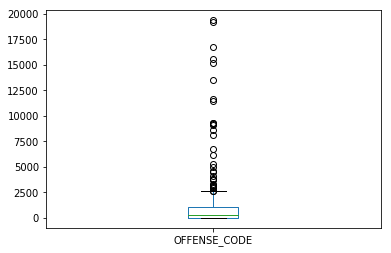

In [13]:
crime['OFFENSE_CODE'].value_counts().plot(kind = 'box')

### Deskripsi data menurut Offense Code secara histogram

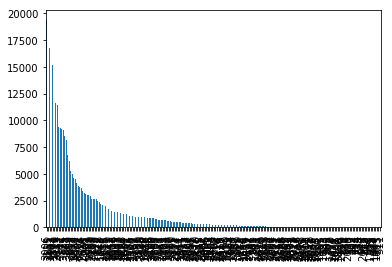

In [14]:
crime['OFFENSE_CODE'].value_counts().plot(kind = 'bar')

### Deskripsi data menurut Tanggal dari Offense Code

In [15]:
def mode(x):
    return x.value_counts().index[0]
crime['OCCURRED_ON_DATE'].astype('int64').groupby(crime['OFFENSE_CODE']).agg({'Tanggal' :['min', 'max', 'mean', mode, 'median']}).astype('datetime64[ns]')

Tanggal                      \
                             min                 max   
OFFENSE_CODE                                           
111          2015-07-02 16:30:00 2018-09-27 20:48:00   
112          2016-02-12 10:25:00 2016-02-12 10:25:00   
121          2016-01-12 16:40:00 2017-12-22 04:49:00   
123          2016-04-17 01:15:00 2017-06-13 18:59:00   
301          2015-06-16 01:57:00 2018-10-02 16:57:00   
311          2015-06-17 15:40:00 2018-10-03 19:05:00   
315          2015-08-11 08:45:00 2015-08-11 08:45:00   
334          2015-07-17 09:23:00 2015-07-17 09:23:00   
335          2018-07-17 01:00:00 2018-07-17 01:00:00   
338          2016-02-09 13:55:00 2016-02-09 13:55:00   
339          2015-07-27 10:47:00 2017-02-07 02:00:00   
349          2015-08-25 20:45:00 2015-08-25 20:45:00   
351          2015-06-19 07:21:00 2018-09-08 09:50:00   
361          2015-06-19 07:21:00 2018-10-01 19:43:00   
371          2015-06-27 00:08:00 2018-09-06 12:33:00   
381          2015-06-17 22:33:00 2018-10-02 00:00:00   
402          2016-01-24 01:45:00 2016-01-24 01:45:00   
403          2015-10-02 21:00:00 2016-10-29 08:25:00   
404          2016-10-29 08:25:00 2016-10-29 08:25:00   
413          2015-06-15 02:00:00 2018-10-03 20:00:00   
423          2015-06-15 07:45:00 2018-10-03 09:15:00   
432          2015-08-05 14:16:00 2015-08-05 14:16:00   
511          2015-08-10 19:13:00 2015-08-10 19:13:00   
520          2015-06-15 10:00:00 2018-10-03 11:30:00   
521          2015-06-15 10:00:00 2018-09-26 09:00:00   
522          2015-06-15 09:00:00 2018-10-02 11:09:00   
527          2016-01-12 14:45:00 2016-01-12 14:45:00   
530          2015-07-27 12:00:00 2015-07-27 12:00:00   
540          2015-06-16 01:54:00 2018-09-29 06:30:00   
541          2015-07-06 07:35:00 2018-08-19 03:11:00   
...                          ...                 ...   
3201         2015-06-15 00:00:00 2018-10-03 12:43:00   
3202         2015-06-16 16:00:00 2018-10-01 05:05:00   
3203         2015-07-19 12:00:00 2018-09-16 21:00:00   
3205         2015-06-15 16:30:00 2018-10-01 18:19:00   
3207         2015-06-15 08:20:00 2018-10-03 16:37:00   
3208         2015-06-15 14:20:00 2018-10-03 15:33:00   
3301         2015-06-15 10:21:00 2018-10-03 19:32:00   
3302         2015-07-16 06:52:00 2018-06-09 14:36:00   
3303         2015-08-08 01:02:56 2018-09-09 00:32:00   
3304         2015-06-18 01:23:00 2018-09-30 22:00:00   
3305         2015-06-16 16:45:00 2018-09-28 12:27:00   
3402         2015-06-15 20:30:00 2018-09-16 17:35:00   
3403         2015-12-31 08:13:00 2018-09-05 23:00:00   
3410         2015-06-15 01:15:00 2018-10-03 20:00:00   
3501         2015-06-15 16:51:00 2018-10-03 14:20:00   
3502         2015-06-15 12:15:00 2018-10-02 19:50:00   
3503         2015-06-15 19:33:00 2018-10-02 15:14:00   
3620         2015-06-23 18:00:00 2018-09-18 16:47:00   
3625         2015-06-22 01:44:00 2018-09-30 05:00:00   
3801         2015-06-15 07:31:00 2018-10-03 15:34:00   
3802         2015-06-15 12:10:00 2018-10-03 14:12:00   
3803         2015-06-15 07:10:00 2018-10-03 20:16:00   
3805         2015-06-16 15:00:00 2018-10-03 11:50:00   
3807         2015-06-15 09:05:00 2018-10-02 09:24:00   
3810         2015-06-21 17:45:00 2018-10-02 18:30:00   
3811         2015-06-20 13:00:00 2018-10-02 18:23:00   
3820         2015-06-18 07:17:00 2018-10-03 15:51:00   
3821         2015-06-18 07:30:00 2018-09-30 17:20:00   
3830         2015-06-17 00:47:00 2018-10-02 23:16:00   
3831         2015-06-15 11:10:00 2018-10-03 19:30:00   

                                                                \
                                      mean                mode   
OFFENSE_CODE                                                     
111          2017-02-27 19:40:55.636363264 2015-11-26 02:00:00   
112          2016-02-12 10:25:00.000000000 2016-02-12 10:25:00   
121          2016-11-23 03:05:40.000000000 2016-01-12 16:40:00   
123          2016-11-14 10:07:00.000000000 2

### Deskripsi data menurut Latitude & Longtitude

In [16]:
crime.agg({'Lat' :['min', 'max', 'mean', mode, 'median', 'var', 'std', 'skew', 'kurt'], 'Long' :['min', 'max', 'mean', mode, 'median', 'var', 'std', 'skew', 'kurt']})

Lat        Long
min      -1.000000  -71.178674
max      42.395042   -1.000000
mean     42.212995  -70.906030
mode     42.348624  -71.082776
median   42.325552  -71.077493
var       4.724085   12.361074
std       2.173496    3.515832
skew    -19.827352   19.831624
kurt    391.211516  391.324226

### Deskripsi data menurut Latitude & Longtitude secara histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002371647D0F0>,
      dtype=object)

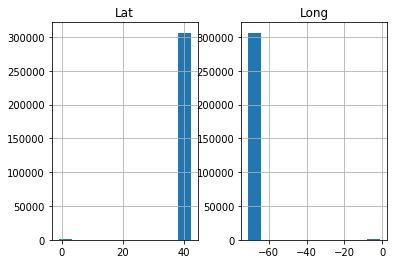

In [17]:
crime.hist(column=['Lat','Long'])

### Deskripsi data menurut Latitude & Longtitude secara Boxplot

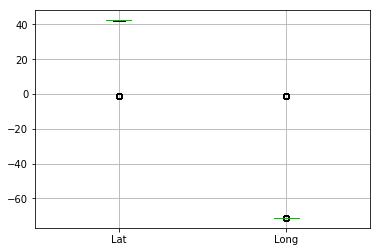

In [18]:
crime.boxplot(column=['Lat','Long'])

### Deskripsi data menurut Tahun

In [19]:
crime.agg({'YEAR' :['min', 'max', 'mean', mode, 'median', 'var', 'std', 'skew', 'kurt']})

YEAR
min     2015.000000
max     2018.000000
mean    2016.598676
mode    2017.000000
median  2017.000000
var        1.019645
std        1.009775
skew      -0.083805
kurt      -1.090411

### Deskripsi data menurut Tahun secara Histogram

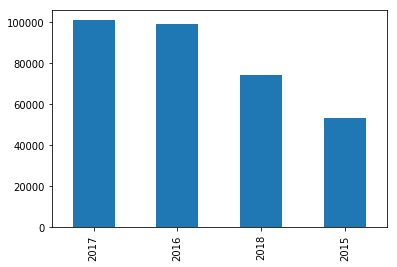

In [20]:
crime.YEAR.value_counts().plot(kind = 'bar')

### Deskripsi data menurut Tahun secara Boxplot

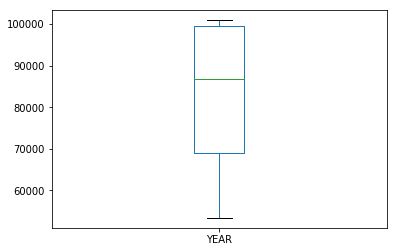

In [21]:
crime.YEAR.value_counts().plot(kind = 'box')

### Fungsi distribusi peluang
#### Fungsi distribusi peluang yang digunakan adalah distribusi binomial. Distribusi ini dipilih karena walau data memiliki banyak faktor yang harus diteliti, seperti offense code, district, reporting area, tanggal, dan waktu, hasil yang diminta hanya bersifat benar atau salah. Maka dari itu, digunakan distribusi binomial

### Jawaban pertanyaan 2-a-i
#### Ekspektasi jumlah Homicide jika diambil 1000 data
#### Mencari jumlah Homicide, lalu bagi dengan total data dan kalikan dengan 1000. Lalu bulatkan hasilnya

In [22]:
Category = crime['OFFENSE_CODE_GROUP']
count_row = crime.shape[0]
CatHom = Category[Category == 'Homicide'].count()
probability = ((CatHom / count_row * 1000).round(0)).astype(np.int64)
probability

1

### Jawaban pertanyaan 2-a-ii
#### Ekspektasi jumlah Homicide tanpa shooting jika diambil 1000 data
#### Mencari jumlah Homicide tanpa shooting, lalu bagi dengan total data dan kalikan dengan 1000. Lalu bulatkan hasilnya

In [23]:
CatHomNS = crime['OFFENSE_CODE_GROUP'].loc[(crime['OFFENSE_CODE_GROUP'] == 'Homicide') & (crime['SHOOTING'] != 'Y')].count()
probability = ((CatHomNS / count_row * 1000).round(0)).astype(np.int64)
probability

0

### Jawaban pertanyaan 2-a-iii
#### Ekspektasi jumlah kejahatan yang terjadi jam 20:00 dan di hari sabtu jika diambil 1000 data
#### Mencari jumlah kejahatan yang terjadi jam 20:00 dan di hari sabtu, lalu bagi dengan total data dan kalikan dengan 1000. Lalu bulatkan hasilnya

In [24]:
Hour = crime['HOUR'].loc[(crime['HOUR'] == 20) & (crime['DAY_OF_WEEK'] == 'Saturday')].count()
probability = ((Hour / count_row * 1000).round(0)).astype(np.int64)
probability

7

### Jawaban pertanyaan 2-b-i
#### Ekspektasi jumlah kejahatan yang terjadi di Geneva Ave atau Prescott Street jika diambil 2000 data
#### Mencari jumlah kejahatan yang terjadi di Geneva Ave atau Prescott Street, lalu bagi dengan total data dan kalikan dengan 2000. Lalu bulatkan hasilnya

In [25]:
Place = crime['STREET'].loc[(crime['STREET'] == 'GENEVA AVE') | (crime['STREET'] == 'PRESCOTT ST')].count()
probability = ((Place / count_row * 2000).round(0)).astype(np.int64)
probability

11

### Jawaban pertanyaan 2-b-ii
#### Ekspektasi jumlah kejahatan yang dilaporkan di Kantor Polisi nomor 495 dan distrik E18 jika diambil 2000 data
#### Mencari jumlah kejahatan yang dilaporkan di Kantor Polisi nomor 495 dan distrik E18, lalu bagi dengan total data dan kalikan dengan 2000. Lalu bulatkan hasilnya

In [26]:
District = crime['DISTRICT'].loc[(crime['DISTRICT'] == 'E18') | (crime['REPORTING_AREA'] == 495)].count()
probability = ((District / count_row * 2000).round(0)).astype(np.int64)
probability

109

### Jawaban pertanyaan 2-b-iii
#### Ekspektasi jumlah kejahatan yang tidak terjadi di Hari Libur jika diambil 2000 data
#### Mencari jumlah kejahatan yang tidak terjadi di Hari Libur, lalu bagi dengan total data dan kalikan dengan 2000. Lalu bulatkan hasilnya

In [27]:
Weekday = crime['DAY_OF_WEEK'].loc[(crime['DAY_OF_WEEK'] != 'Saturday') & (crime['DAY_OF_WEEK'] != 'Sunday')].count()
probability = ((Weekday / count_row * 2000).round(0)).astype(np.int64)
probability

1467

# Soal 4
## Crypto.csv
### Header

In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import scipy
from scipy.stats import gamma
import matplotlib.pyplot as plt

### Membaca data

In [29]:
data = pd.read_csv('crypto.csv', header = None)
data.columns = ['Amount']
data

Amount
0       0.000015
1       0.000023
2       0.000033
3       0.000037
4       0.000037
5       0.000037
6       0.000036
7       0.000073
8       0.000072
9       0.000073
10      0.000067
11      0.000069
12      0.000082
13      0.000113
14      0.000111
15      0.000112
16      0.000124
17      0.000124
18      0.000113
19      0.000109
20      0.000098
21      0.000090
22      0.000086
23      0.000085
24      0.000085
25      0.000084
26      0.000082
27      0.000081
28      0.000060
29      0.000037
...          ...
632188  0.113194
632189  0.087992
632190  0.101825
632191  0.334725
632192  0.690254
632193  0.625767
632194  0.230924
632195  0.114744
632196  0.089624
632197  0.143865
632198  0.112651
632199  0.126489
632200  0.145279
632201  0.132727
632202  0.126085
632203  0.225772
632204  0.129094
632205  0.228046
632206  0.323451
632207  0.073590
632208  0.074413
632209  0.061524
632210  0.130473
632211  0.211989
632212  0.070326
632213  0.045676
632214  0.057948
632215  0.082787
632216  0.091944
632217  0.089511

[632218 rows x 1 columns]

### Deskripsi data
#### Deskripsi data numerik

In [30]:
def mode(x):
    return x.value_counts().index[0]
data.agg({'Amount':['min', 'max', 'mean', mode, 'median', 'var', 'std', 'skew', 'kurtosis']})

Amount
min       2.925000e-09
max       2.383502e+06
mean      2.030181e+02
mode      2.000000e-06
median    9.733500e-03
var       7.532042e+07
std       8.678734e+03
skew      1.182396e+02
kurtosis  2.229747e+04

#### Deskripsi data objek (tidak ada objek non-numerik)

### Boxplot

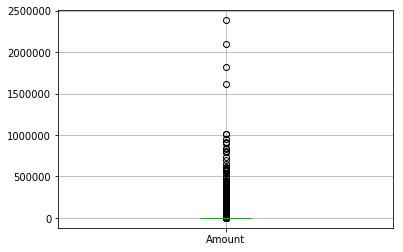

In [31]:
amt = data[['Amount']]
amt.boxplot()

### Histogram

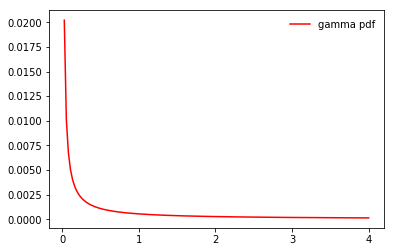

In [32]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 4, 150)
beta = amt.var() / amt.mean()
alpha = amt.mean() / beta
ax.plot(x, gamma.pdf(x, alpha, 0, beta), 'r-', label='gamma pdf')
ax.legend(loc='best', frameon=False)
plt.xticks([0,1,2,3,4])
plt.show()

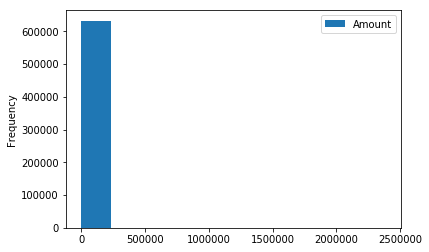

In [33]:
amt.plot(kind = 'hist')

### Fungsi distribusi peluang
#### Fungsi distribusi peluang yang digunakan adalah distribusi gamma. Fungsi ini digunakan melihat dari tipe data yang memiliki frekuensi sangat tinggi pada satu sisi dan kemudian secara bertahap berkurang, namun tidak memenuhi kriteria untuk menggunakan distribusi eksponensial (alpha != 1) maupun chi-squared (alpha != v / 2 dan beta != 2).

### Jawaban pertanyaan 4-a-i
#### Ekspektasi jumlah cryptocurrency dengan nilai kurang dari 0.177013.
#### Diselesaikan dengan menghitung fungsi peluang gamma untuk nilai < 0.177013 lalu kalikan dengan 1000 kali sampel. Sebelumnya tentukan dahulu nilai alpha dan beta dari sampel dengan melihat variansi dan rata-rata data

In [34]:
from scipy.stats import gamma

beta = amt.var() / amt.mean()
alpha = amt.mean() / beta

prob4a = gamma.cdf(0.177013, alpha, scale = beta)[0]
(prob4a * 1000).astype(np.int64)

992

### Jawaban pertanyaan 4-a-ii
#### Ekspektasi jumlah cryptocurrency dengan nilai lebih dari 177.013.
#### Diselesaikan dengan menghitung fungsi peluang gamma untuk nilai > 177.013 lalu kalikan dengan 1000 kali sampel

In [35]:
prob4a2 = gamma.sf(177.013, alpha, scale = beta)
(prob4a2 * 1000).astype(np.int64)

array([3], dtype=int64)

### Jawaban pertanyaan 4-b-i
#### Ekspektasi cryptocurrency baru dengan nilai lebih dari 0.013
#### Diselesaikan dengan langsung menghitung fungsi peluang gamma untuk nilai > 0.013

In [36]:
prob4b = gamma.sf(0.013, alpha, scale = beta)
prob4b

array([0.0090372])

### Jawaban pertanyaan 4-b-ii
#### Ekspektasi cryptocurrency baru dengan nilai kurang dari 17.7
#### Diselesaikan dengan langsung menghitung fungsi peluang gamma untuk nilai < 17.7

In [37]:
prob4b2 = gamma.cdf(17.7, alpha, scale = beta)
prob4b2

array([0.99488372])

# Soal 5
## Athletes.csv
### Header

In [38]:
import numpy as np
import pandas as pd
import matplotlib
import scipy
import datetime
from scipy.stats import gamma
import matplotlib.pyplot as plt

### Membaca data

In [39]:
athlete = pd.read_csv('athletes.csv')
athlete

Name  Medal
0                                             A Dijiang      0
1                                              A Lamusi      0
2                              A. Aanantha Sambu Mayavo      0
3                                       A. Abdul Razzak      0
4                                               A. Brun      0
5                                            A. Buydens      0
6                                        A. Charles Six      0
7                                          A. Christory      0
8                                             A. Darnis      0
9                                         A. Duponcheel      0
10                                           A. E. Page      0
11                                        A. G. Chagale      0
12                       A. Germaine Golding (Regnier-)      0
13                                           A. Godinat      0
14                                    A. Hurtado Vargas      0
15                                     A. Hussain Ahmed      0
16                                       A. J. J. Fridt      0
17              A. J. Tyronne Benildus "Benny" Fernando      0
18                                          A. Kordonis      0
19                                            A. Laffen      0
20                                        A. Lafontaine      0
21                                    A. Lambrecht, Jr.      0
22                                         A. O. Pinner      0
23                                         A. Papadakis      0
24                                           A. Porcher      0
25                                           A. Priftis      0
26                                             A. Roger      0
27                                         A. S. Harley      0
28                                    A. Sattar Basheer      0
29                                           A. Schmitt      0
...                                                 ...    ...
134701                            Isabelle Regina Werth     10
134702                                     Marit Bjrgen     10
134703                      Polina Hryhorivna Astakhova     10
134704                         Raisa Petrovna Smetanina     10
134705                      Raymond Clarence "Ray" Ewry     10
134706                                Stefania Belmondo     10
134707                    Vitaly Venediktovich Shcherbo     10
134708                                        Yang Yang     10
134709                        gnes Keleti-Srkny (Klein)     10
134710                    Aleksandr Vladimirovich Popov     11
134711                             Carl Townsend Osburn     11
134712                                Mark Andrew Spitz     11
134713                   Matthew Nicholas "Matt" Biondi     11
134714                        Viktor Ivanovych Chukarin     11
134715                           Vra slavsk (-Odloilov)     11
134716                          Aleksey Yuryevich Nemov     12
134717                           Birgit Fischer-Schmidt     12
134718             Dara Grace Torres (-Hoffman, -Minas)     12
134719  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     12
134720                    Natalie Anne Coughlin (-Hall)     12
134721                             Paavo Johannes Nurmi     12
134722                               Ryan Steven Lochte     12
134723                                       Sawao Kato     12
134724                      Borys Anfiyanovych Shakhlin     13
134725                              Edoardo Mangiarotti     13
134726                              Ole Einar Bjrndalen     13
134727                                      Takashi Ono     13
134728                     Nikolay Yefimovich Andrianov     15
134729               Larysa Semenivna Latynina (Diriy-)     18
134730                          Michael Fred Phelps, II     28

[134731 rows x 2 columns]

### Deskripsi data
#### Deskripsi data numerik

In [40]:
athlete.describe()

Medal
count  134731.000000
mean        0.295277
std         0.724716
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        28.000000

### Deskripsi data secara lengkap

In [41]:
def mode(x):
    return x.value_counts().index[0]
athlete.agg({'Medal' :['min', 'max', 'mean', mode, 'median', 'var', 'std', 'skew', 'kurt']})

Medal
min      0.000000
max     28.000000
mean     0.295277
mode     0.000000
median   0.000000
var      0.525213
std      0.724716
skew     4.819999
kurt    51.562526

### Deskripsi data secara boxplot

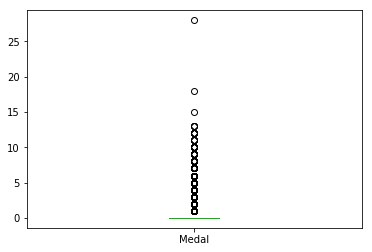

In [42]:
Medals = athlete['Medal']
Medals.plot(kind = 'box')

### Deskripsi data secara histogram

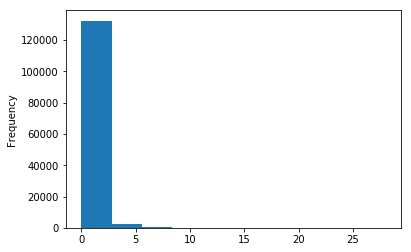

In [43]:
Medals.plot(kind = 'hist')

### Deskripsi data secara kontinu

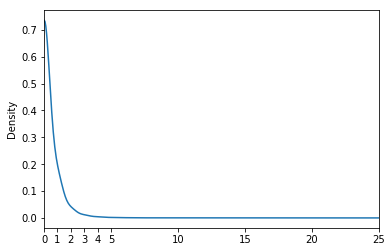

In [44]:
Medals.plot.kde(xlim = [0,25], bw_method=0.6, xticks=[0,1,2,3,4,5,10,15,20,25])

### Fungsi distribusi peluang
#### Fungsi distribusi peluang yang awalnya ingin digunakan adalah distribusi Gamma. Distribusi ini ingin dipilih karena bentuk yang mirip dengan bentuk pada distribusi gamma
#### Namun, data sebenarnya bersifat diskrit. Maka dari itu, digunakan distribusi binomial karena evaluasi data yang mungkin hanya menghasilkan nilai ya atau tidak
#### Kesimpulan : Binomial

#### Pendekatan dengan distribusi gamma (jika misalnya data kontinu)

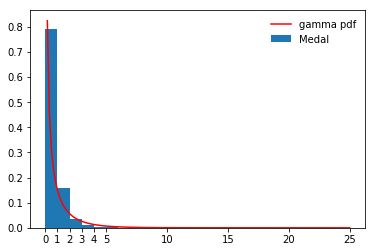

-3.386551541794366e-31


In [53]:
alp, locx, bt = gamma.fit(Medals)
fig, ax = plt.subplots(1, 1)
x = np.linspace(locx, 25, 150)
beta = Medals.var() / Medals.mean()
alpha = Medals.mean() / beta
ax.plot(x, gamma.pdf(x, alp, locx, bt), 'r-', label='gamma pdf')
ax.hist(Medals, density='True', bins=range(25))
ax.legend(loc='best', frameon=False)
plt.xticks([0,1,2,3,4,5,10,15,20,25])
plt.show()
print(locx)

### Jawaban pertanyaan 5-a-i
#### Peluang jumlah didapat 0 medali jika diambil 1 data
#### Mencari jumlah 0 medali, lalu bagi dengan total data.

In [46]:
count_row = athlete.shape[0]
Zero = Medals[Medals == 0].count()
probability = (Zero / count_row)
probability

0.7906792052311643

### Jawaban pertanyaan 5-a-ii
#### Peluang jumlah didapat lebih dari 10 medali jika diambil 1 data
#### Mencari jumlah lebih dari 10 medali, lalu bagi dengan total data.

In [47]:
Ten = Medals[Medals > 10].count()
probability = (Ten / count_row)
probability

0.00015586613325812174

### Jawaban pertanyaan 5-a-iii
#### Peluang jumlah didapat 3 medali jika diambil 1 data
#### Mencari jumlah 3 medali, lalu bagi dengan total data.

In [48]:
Three = Medals[Medals == 3].count()
probability = (Three / count_row)
probability

0.01027974259821422

### Jawaban pertanyaan 5-a-iv
#### Peluang jumlah didapat 1 atau 5 medali jika diambil 1 data
#### Mencari jumlah 1 atau medali, lalu bagi dengan total data.

In [49]:
OneorFive = Medals[(Medals == 1) | (Medals == 5)].count()
probability = (OneorFive / count_row)
probability

0.1588424341836697

### Jawaban pertanyaan 5-b
#### Confidence interval 95%
#### Jika diambil n=1 maka: x-bar=mu=0.2953, std=0.7247, z=1.96
#### maka interval = 0.2953-1.96*0.7247<mu<0.2953+1.96*0.7247
#### = -1.125112 < mu < 1.715712
#### karena medali tidak mungkin bernilai negatif maka:
#### 0 < mu < 1.715712
#### JIka diambil n=134731:
#### interval = 0.2953-1.96*(0.7247/1354731^(1/2))<mu<0.2953-1.96*(0.7247/1354731^(1/2))
#### = 0.29407964046<mu<0.29652035953



In [52]:
alpha = 0.05
xbar = Medals.mean()
std = Medals.std() / (134731**(0.5))
# Z didapat dari tabel
z = 1.96 
bot = xbar - z * std
up = xbar + z * std
print(bot, " -- mean -- ", up)

0.2914074416122283  -- mean --  0.2991470707123295
